# **Логистическая Регрессия**

## **<span style='color:#F1A424'>Реализация градиентного спуска</span>**

Реализуем логистическую регрессию

- В случае логистической регрессией, мы можем использовать только градиентный спуск
- Потому что нет явного матричного способа найти оптимальные коэффициенты

### **Функция Потерь**

**Функция ошибки** для логистической регрессии в случае **бинарной классификации** называется `бинарной кросс-энтропией` (log loss) и записывается следующим образом:


$$L=-\frac{1}{n}(y_i \log h_{\theta}(x_i) + (1-y_i) \log(1-h_{\theta}(x_i))),$$


- $x_i$ — вектор признаков 
- $i$-го примера из обучающей выборки
- $y_i$ — истинный класс для соответствующего примера (0 или 1)
- $n$ — число примеров в обучающей выборке
- $h_{\theta}(x)$ — sigmoid функция

<br>

**sigmoid функция**:

$$h_{\theta}(x)=\frac{1}{1+\exp^{-\theta x}},$$


- $\theta$ — вектор параметров логистической регрессии
- $x$ - вектор признаков объекта из выборки

Соответствующий градиент функции ошибки равен:

$$\nabla L=\frac{1}{n}\sum_{i=1}^{n}{(h_{\theta}(x_i)-y_i)x_i}$$

Реализация логистической регрессии будет основана на **оптимизации функции ошибки** градиентным спуском.

### **Предсказание дохода граждан**

- В качестве экспериментальных данных возьмем датасет о доходах граждан в различных странах Adult Income 
- Сделаем необходимую предобработку


### **Импортируем модули**

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

 ### **Импортируем данные**
 
 Импортируем данные и добавим названия фичеров

In [5]:
adult = pd.read_csv('adult.data',
                    names=['age', 'workclass', 
                           'fnlwgt', 'education',
                           'education-num', 
                           'marital-status', 
                           'occupation',
                           'relationship', 
                           'race', 'sex', 
                           'capital-gain',
                           'capital-loss',
                           'hours-per-week',
                           'native-country', 
                           'salary']
                     )

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Предобработка данных**
- Убираем лишние признаки
- Превратим целевую переменную в бинарные значение (1/0) (получает ли сотрудник больше или меньше)
- Превратим категориальные признаки в цифровые используя One-Hot Encoding (OHE)

In [6]:
# Избавиться от лишних признаков
adult.drop(['native-country'], axis=1, inplace=True)

# Сконвертировать целевой столбец в бинарные значения
adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')

# Сделать one-hot encoding для некоторых признаков
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
adult.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Нормализуем числовые признаки

In [7]:
# Нормализовать нуждающиеся в этом признаки
a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values

norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features
adult.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [8]:
# Разбить таблицу данных на матрицы X и y
X = adult[list(set(adult.columns) - set(['salary']))].values
y = adult['salary'].values

# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:,None], X])
m = X.shape[1]
print(m,'features')
print(X.shape[0],'instances')

67 features
32561 instances


### **Функции для градиентного спуска**

- Риализуем функцию `sigmoid`
- Функцию вычисляющую градиент бинарной кросс-энтропии <code>bin_crossentropy_grad</code> (функция потерь)

In [12]:
from tqdm.notebook import tqdm

# Функция Сигмойда
def sigmoid(X, theta):
    return 1.0 / (1.0 + np.exp(-X.dot(theta)))

# Градиент бинарной кросс энтропии
# sigmoid(X,theta) - классификации
# X.theta - регрессии
def bin_crossentropy_grad(X, y, theta):
    n = X.shape[0]
    grad = 1.0 / n * X.T.dot(sigmoid(X,theta) - y )
    return grad

# Шаг градиентного спуска
def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad

# Главная функция 
def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta

### **Оптимизируем theta**

Инициализируем theta для всех рядов инициализируем theta0

In [13]:
# theta0
theta_0 = np.ones(m)

# Оптимизировать параметр линейной регрессии theta на всех данных
theta = optimize(X=X, y=y,
                 grad_func=bin_crossentropy_grad, # gradient evaluation function
                 start_theta=theta_0,  # staring theta
                 alpha=1.0,   # learning rate
                 n_iters=300)  # number of iterations

theta[:10]   

array([-3.18220152,  0.33637837,  0.64614323,  0.33800978,  0.99594815,
        0.83539825, -0.42823004, -0.07818779,  0.94851085,  0.40839447])

Делаем предсказание <code>sigmoid(X, theta)</code> (вероятность принадлежности классу)
- ставим пороговое значение 0.5 и считаем критерии оценки 

In [14]:
def print_logisitc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

# Сделать предсказания на тренировочной выборке и
# посчитать значение метрики accuracy и F1-score
y_pred = sigmoid(X, theta) > 0.5

print(y_pred[:10])
print_logisitc_metrics(y, y_pred)


[False False False False  True  True False False  True  True]
acc = 0.85 F1-score = 0.65


### **Train/Test разбиение**

- Мы уже знаем, что этой выборке нельзя доверять, поэтому разбиваем данные и оптимизируем
- Отрисуем **ROC-кривую**, посчитаем её значения и значение площади под кривой 

Что такое ROC?

**ROC-кривая** отражает чувствительность модели к разным порогам классификации
- описывает взаимосвязь между чувствительностью модели (TPR, доля истинно положительных примеров) 
- и её специфичностью (описываемой в отношении долей ложноположительных результатов FPR) 
- TPR = TP/P; FPR = FP/N; для разных пороговых значении соотношение может меняться 

In [15]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибку F1-score

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

theta = optimize(X_train, 
                 y_train, 
                 bin_crossentropy_grad, 
                 np.ones(m), 
                 1.0, 
                 300)

y_pred = sigmoid(X_valid, theta) > 0.5

print_logisitc_metrics(y_valid, y_pred)

acc = 0.85 F1-score = 0.66


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):

    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=10)
    plt.xlabel('False positive rate (FPR)', fontsize=10)
    plt.ylabel('True positive rate (TPR)', fontsize=10)
    plt.legend(fontsize=10)

[0.29411787 0.20599952 0.03546498 ... 0.00461278 0.00393251 0.00393095]


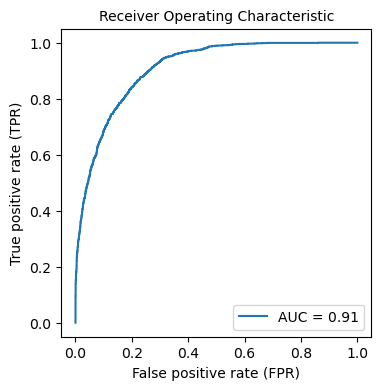

In [17]:
# Вычислить вероятности принадлежности классу 1 
# для каждого объекта из валидационной выборки
y_pred_proba = sigmoid(X_valid, theta)

calc_and_plot_roc(y_valid, y_pred_proba)